In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

In [ ]:
original_frame = cv2.imread("/0882.png")

In [ ]:
frame = cv2.imread("/0882x4.png")

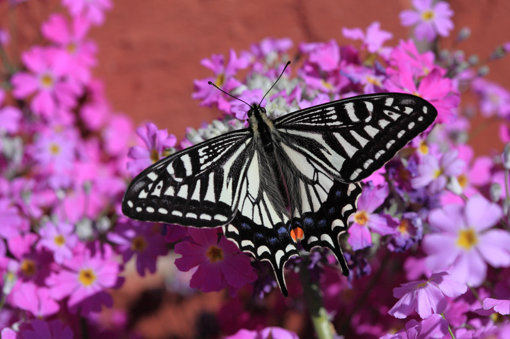

In [ ]:
cv2_imshow(frame)

In [ ]:
gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
gray_frame = frame

In [ ]:
frame = output2.astype(np.float32)

In [ ]:
gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
#for only sobel based edge interpolation
sobel_x = cv2.Sobel(gray_frame, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_frame, cv2.CV_64F, 0, 1, ksize=3)
R1 = np.sqrt((sobel_y*np.sin(0))**2+(sobel_x*np.cos(0))**2)
R2 = np.sqrt((sobel_y*np.sin(np.radians(90)))**2+(sobel_x*np.cos(np.radians(90)))**2)
R3 = np.sqrt((sobel_y*np.sin(np.radians(45)))**2+(sobel_x*np.cos(np.radians(45)))**2)
R4 = np.sqrt((sobel_y*np.sin(np.radians(135)))**2+(sobel_x*np.cos(np.radians(135)))**2)

In [ ]:
#for only sobel based edge interpolation
S1 = R2/R1
S2 = R3/R4

<ipython-input-311-dbea21de8d0a>:1: RuntimeWarning: divide by zero encountered in true_divide
  S1 = R2/R1
<ipython-input-311-dbea21de8d0a>:1: RuntimeWarning: invalid value encountered in true_divide
  S1 = R2/R1
<ipython-input-311-dbea21de8d0a>:2: RuntimeWarning: invalid value encountered in true_divide
  S2 = R3/R4


In [ ]:
def imgExpand(img):
    lenX = len(img[0]) * 2
    lenY = len(img) * 2

    scaled = np.zeros(shape=(lenY, lenX, 3), dtype=np.float32)

    for c in range(0, 3):
        for x in range(0, lenY):
            for y in range(0, lenX):
                if ((x % 2 == 0) and (y % 2 == 0)):
                    scaled[x][y][c] = int(img[int(x / 2)][int(y / 2)][c])

    print(np.shape(scaled))
    return scaled

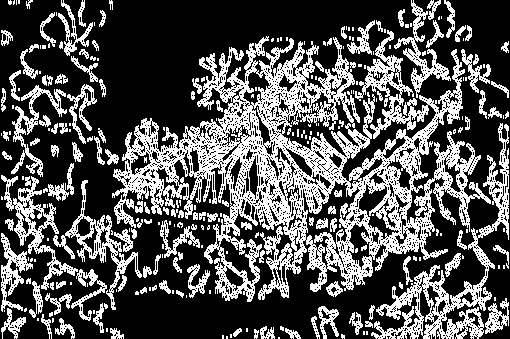

In [ ]:
cv2_imshow(R1)

In [ ]:
#final version of only sobel based edge interpolation
def stage1(img):
    a = 1.6
    b = 40
    for channel in range (3):
      for x in range(2, len(img) - 2):
          for y in range(2, len(img[0]) - 2):
              if ((x % 2 == 0) and (y % 2 == 0)) and (x <= np.shape(img)[0]-2) and (y <= np.shape(img)[1]-2):
                if S1[x//2][y//2] < 1/a and R1[x//2][y//2] >b:
                  img[x+1][y][channel] = (img[x][y][channel]+img[x+2][y][channel])/2
                if S1[x//2][y//2] > a and R2[x//2][y//2] >b:
                  img[x][y-1][channel] = (img[x][y][channel]+img[x][y-2][channel])/2
                if S2[x//2][y//2] > a and R3[x//2][y//2] >b:
                  img[x+1][y-1][channel] = (img[x+2][y][channel]+img[x][y-2][channel])/2
                if S2[x//2][y//2] < 1/a and R4[x//2][y//2] >b:
                  img[x+1][y-1][channel] = (img[x][y][channel]+img[x+2][y-2][channel])/2
    return img

In [ ]:
frame = output2

In [ ]:
frame = cv2.imread("/content/Sobelbird.png")

In [ ]:
#canny edge
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
sharp = cv2.Canny(gray_frame, 0.3*0.4, 0.3)

In [ ]:
#canny edge if applied to BGR frame
sharp = cv2.Canny(frame, 0, 200)

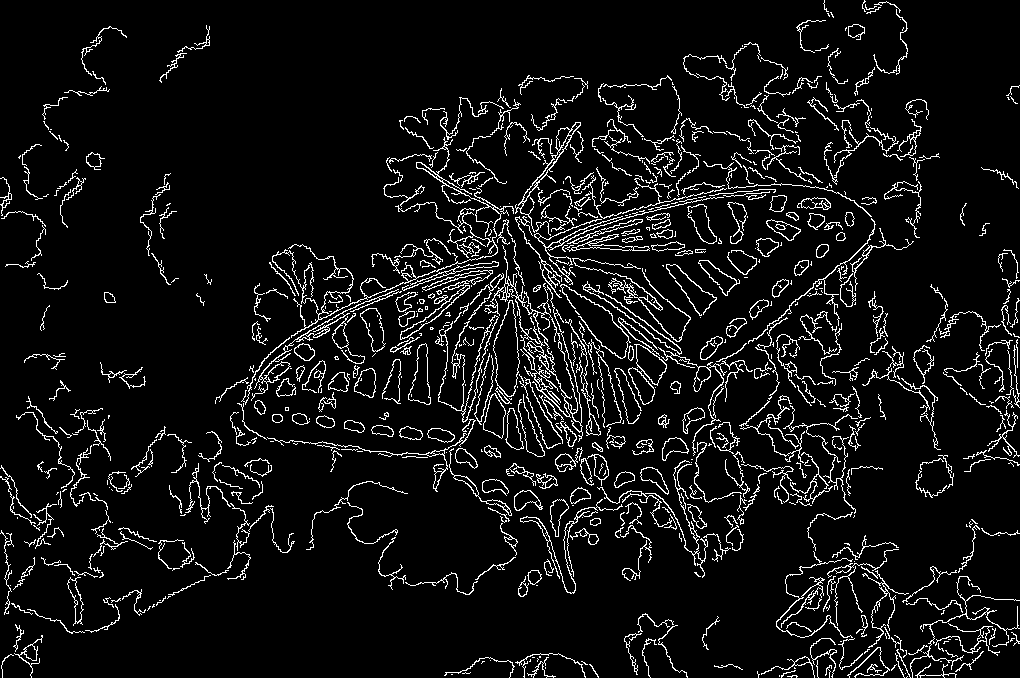

In [ ]:
cv2_imshow(sharp)

In [ ]:
#for zig zag suppression with canny and sobel modified
sobel_x = cv2.Sobel(sharp, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(sharp, cv2.CV_64F, 0, 1, ksize=3)
R1 = np.sqrt((sobel_y*np.sin(0))**2+(sobel_x*np.cos(0))**2)
R2 = np.sqrt((sobel_y*np.sin(np.radians(90)))**2+(sobel_x*np.cos(np.radians(90)))**2)
R3 = np.sqrt((sobel_y*np.sin(np.radians(45)))**2+(sobel_x*np.cos(np.radians(45)))**2)
R4 = np.sqrt((sobel_y*np.sin(np.radians(135)))**2+(sobel_x*np.cos(np.radians(135)))**2)

In [ ]:
#for zig zag suppression with canny and sobel modified
Tx= (np.mean(R1)+np.std(R1))/4
Ty= (np.mean(R2)+np.std(R2))/4
T45= (np.mean(R3)+np.std(R3))/4
T135= (np.mean(R4)+np.std(R4))/4

In [ ]:
#zig zag suppression with canny and sobel modified
def stage1(img):
    a = 1.6
    b = 40

    for channel in range(3):
        for x in range(2, len(img) - 2):
            for y in range(2, len(img[0]) - 2):
                if ((x % 2 == 0) and (y % 2 == 0)) and (x <= np.shape(img)[0] - 2) and (y <= np.shape(img)[1] - 2):
                    if sharp[x//2][y//2] == 255:

                      if R1[x // 2][y // 2] >= R2[x // 2][y // 2] and R1[x // 2][y // 2] >= Tx:
                        #x direction
                        #sobel based interpolation

                          img[x + 1][y][channel] = (img[x][y][channel] + img[x + 2][y][channel]) / 2

                        #zig zag suppression

                          weight_x = img[x][y - 1][channel] / (img[x][y - 1][channel] + img[x][y - 2][channel] + 1)
                          img[x][y-1][channel] = weight_x * img[x][y-1][channel] + (1- weight_x) * img[x][y-2][channel]

                          weight_x = img[x][y + 1][channel] / (img[x][y + 1][channel] + img[x][y + 2][channel] + 1)
                          img[x][y+1][channel] = weight_x * img[x][y+1][channel] + (1- weight_x) * img[x][y+2][channel]

                      if R2[x // 2][y // 2] > R1[x // 2][y // 2] and R2[x // 2][y // 2] >= Ty:
                        #y direction
                          img[x][y - 1][channel] = (img[x][y][channel] + img[x][y - 2][channel]) / 2

                          weight_y = img[x-1][y][channel] / (img[x-1][y][channel] + img[x-2][y][channel] + 1)
                          img[x-1][y][channel] = weight_y * img[x-1][y][channel] + (1- weight_y) * img[x-2][y][channel]

                          weight_y = img[x+1][y][channel] / (img[x+1][y][channel] + img[x+2][y][channel] + 1)
                          img[x+1][y][channel] = weight_y * img[x+1][y][channel] + (1- weight_y) * img[x+2][y][channel]

                      if R3[x // 2][y // 2] >= R4[x // 2][y // 2] and R3[x // 2][y // 2] >= T45:
                        #45 degree direction
                          img[x + 1][y - 1][channel] = (img[x + 2][y][channel] + img[x][y - 2][channel]) / 2

                          weight_45 = img[x-1][y - 1][channel] / (img[x-1][y - 1][channel] + img[x-2][y - 2][channel] + 1)
                          img[x-1][y-1][channel] = weight_45 * img[x-1][y-1][channel] + (1- weight_45) * img[x-2][y-2][channel]

                          weight_45 = img[x+1][y + 1][channel] / (img[x+1][y + 1][channel] + img[x+2][y + 2][channel] + 1)
                          img[x+1][y+1][channel] = weight_45 * img[x+1][y+1][channel] + (1- weight_45) * img[x+2][y+2][channel]
                      if R4[x // 2][y // 2] > R3[x // 2][y // 2] and R4[x // 2][y // 2] >= T135:
                        #135 degree direction
                          img[x + 1][y - 1][channel] = (img[x][y][channel] + img[x + 2][y - 2][channel]) / 2

                          weight_135 = img[x-1][y +1][channel] / (img[x-1][y +1][channel] + img[x-2][y + 2][channel] + 1)
                          img[x-1][y+1][channel] = weight_135 * img[x-1][y+1][channel] + (1- weight_135) * img[x-2][y+2][channel]

                          weight_135 = img[x+1][y - 1][channel] / (img[x+1][y - 1][channel] + img[x+2][y - 2][channel] + 1)
                          img[x+1][y-1][channel] = weight_135 * img[x+1][y-1][channel] + (1- weight_135) * img[x+2][y-2][channel]


    return img

In [ ]:
frame_expand = imgExpand(frame)

(678, 1020, 3)


In [ ]:
frame_expand = imgExpand(frame)

(1356, 2040, 3)


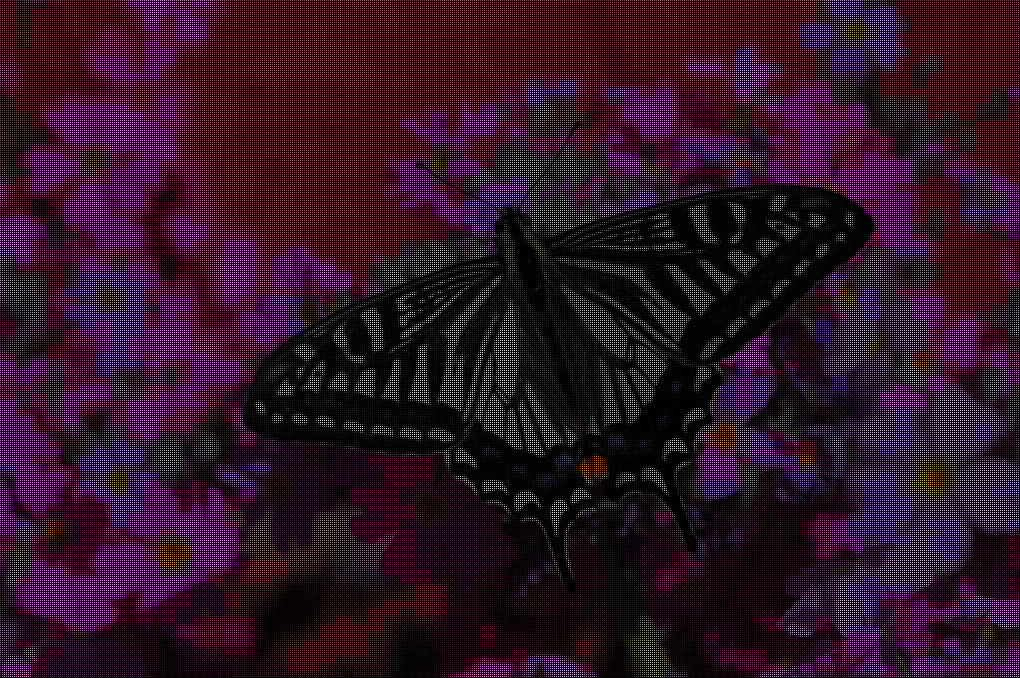

In [ ]:
cv2_imshow(frame_expand)

In [ ]:
output = stage1(frame_expand)

In [ ]:
output = stage1(frame_expand)

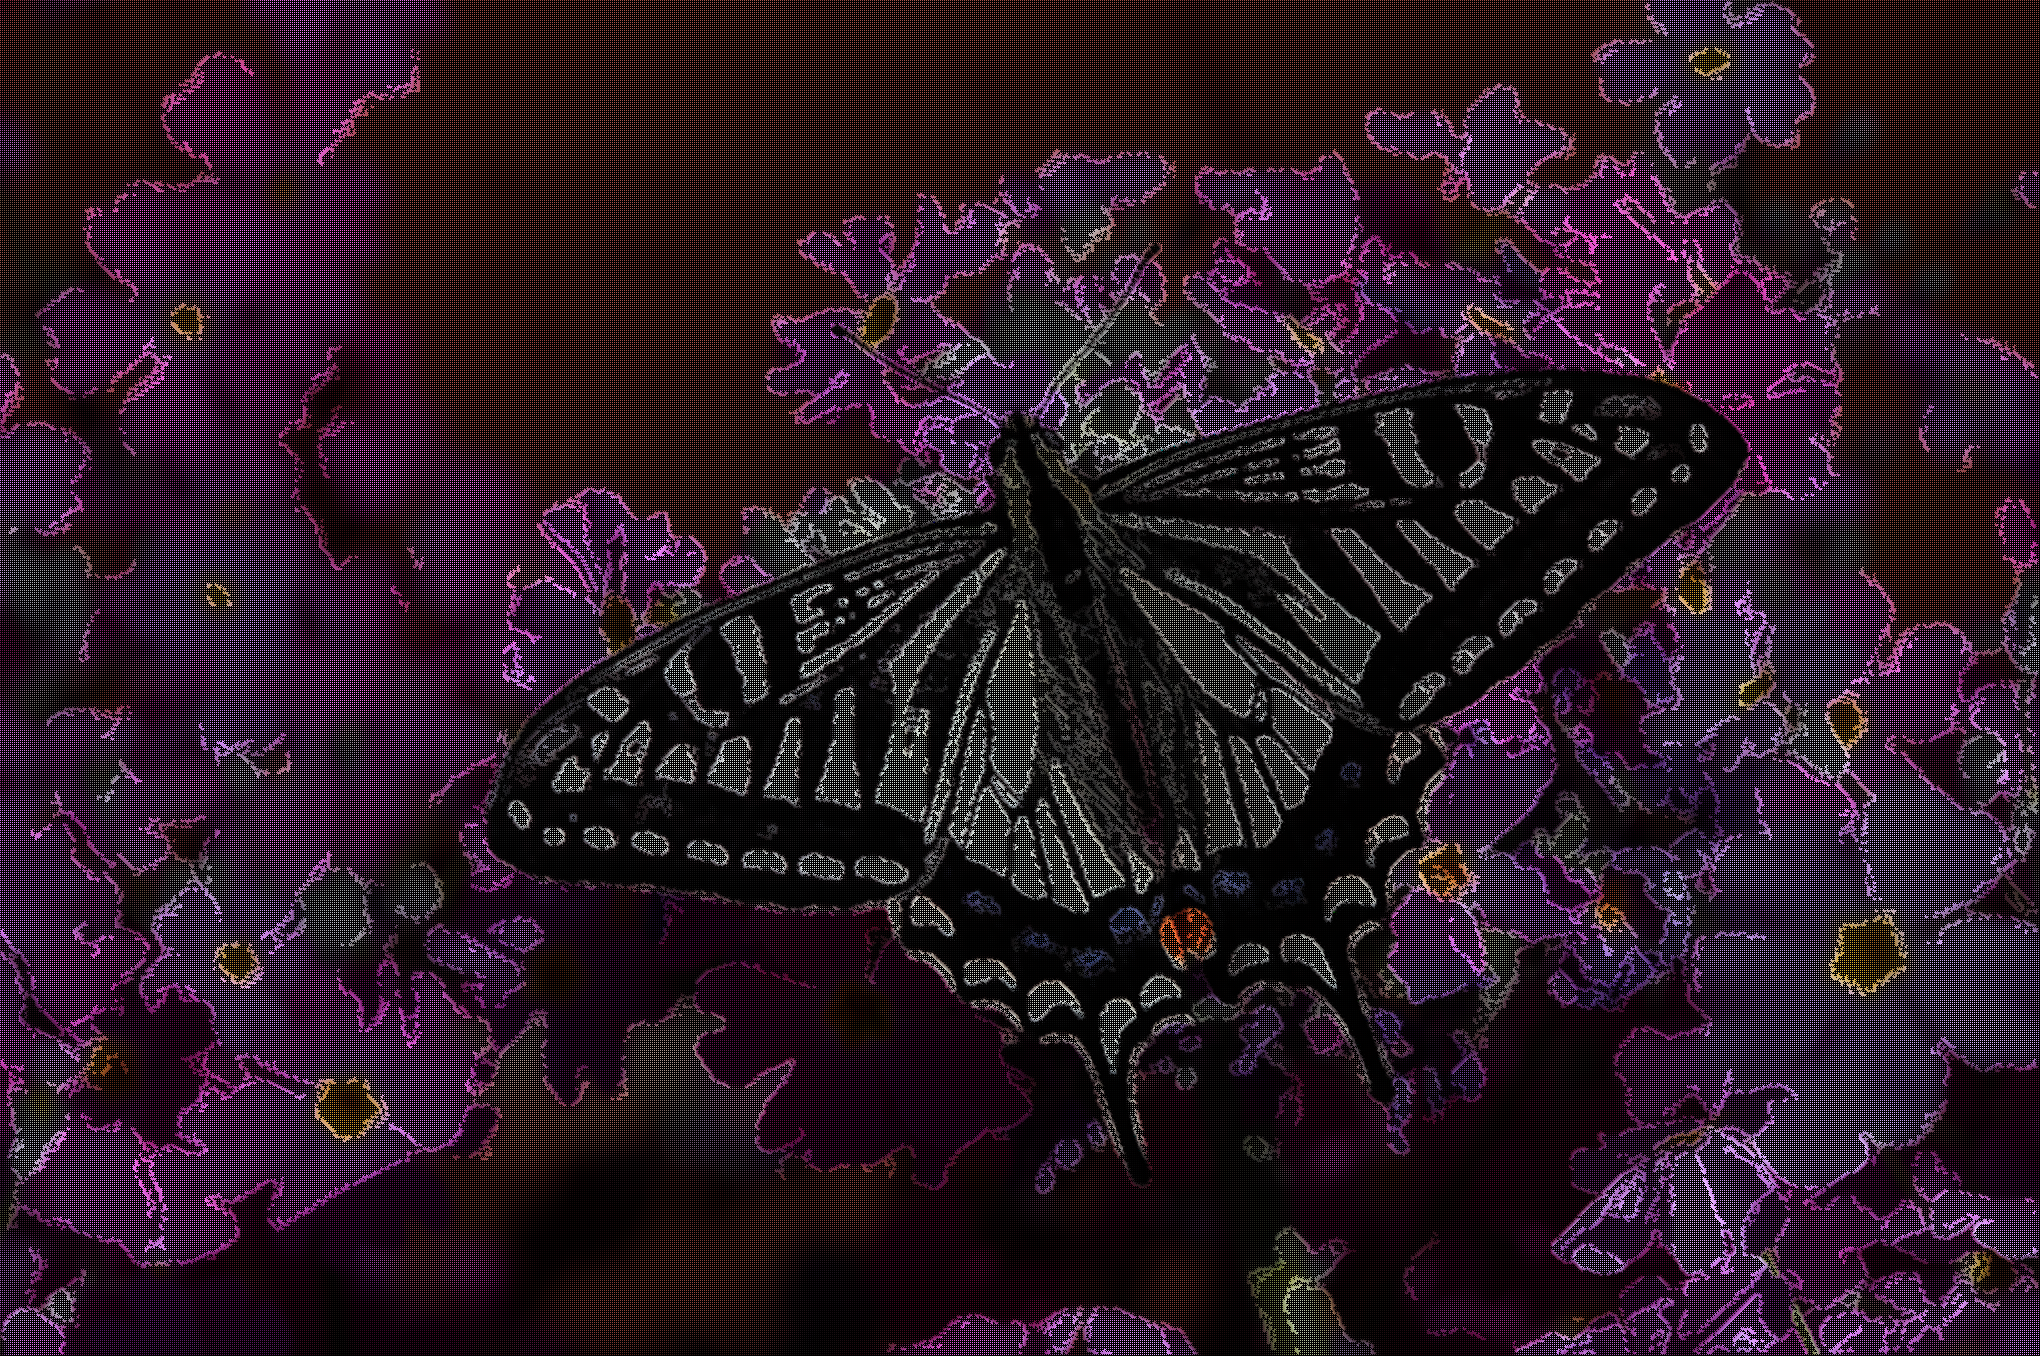

In [ ]:
cv2_imshow(output)

In [ ]:
bilinear_img = cv2.resize(frame, None, fx = 2, fy = 2, interpolation = cv2.INTER_LINEAR)

In [ ]:
bilinear_img = cv2.resize(frame, None, fx = 2, fy = 2, interpolation = cv2.INTER_LINEAR)

In [ ]:
def stage2(img):
    a = 1.6
    b = 40
    for channel in range (3):
      for x in range(0, len(img)):
          for y in range(0, len(img[0])):
              if img[x][y][channel] == 0:
                img[x][y][channel] = bilinear_img[x][y][channel]
    return img

In [ ]:
output2=stage2(output)

In [ ]:
output2=stage2(output)

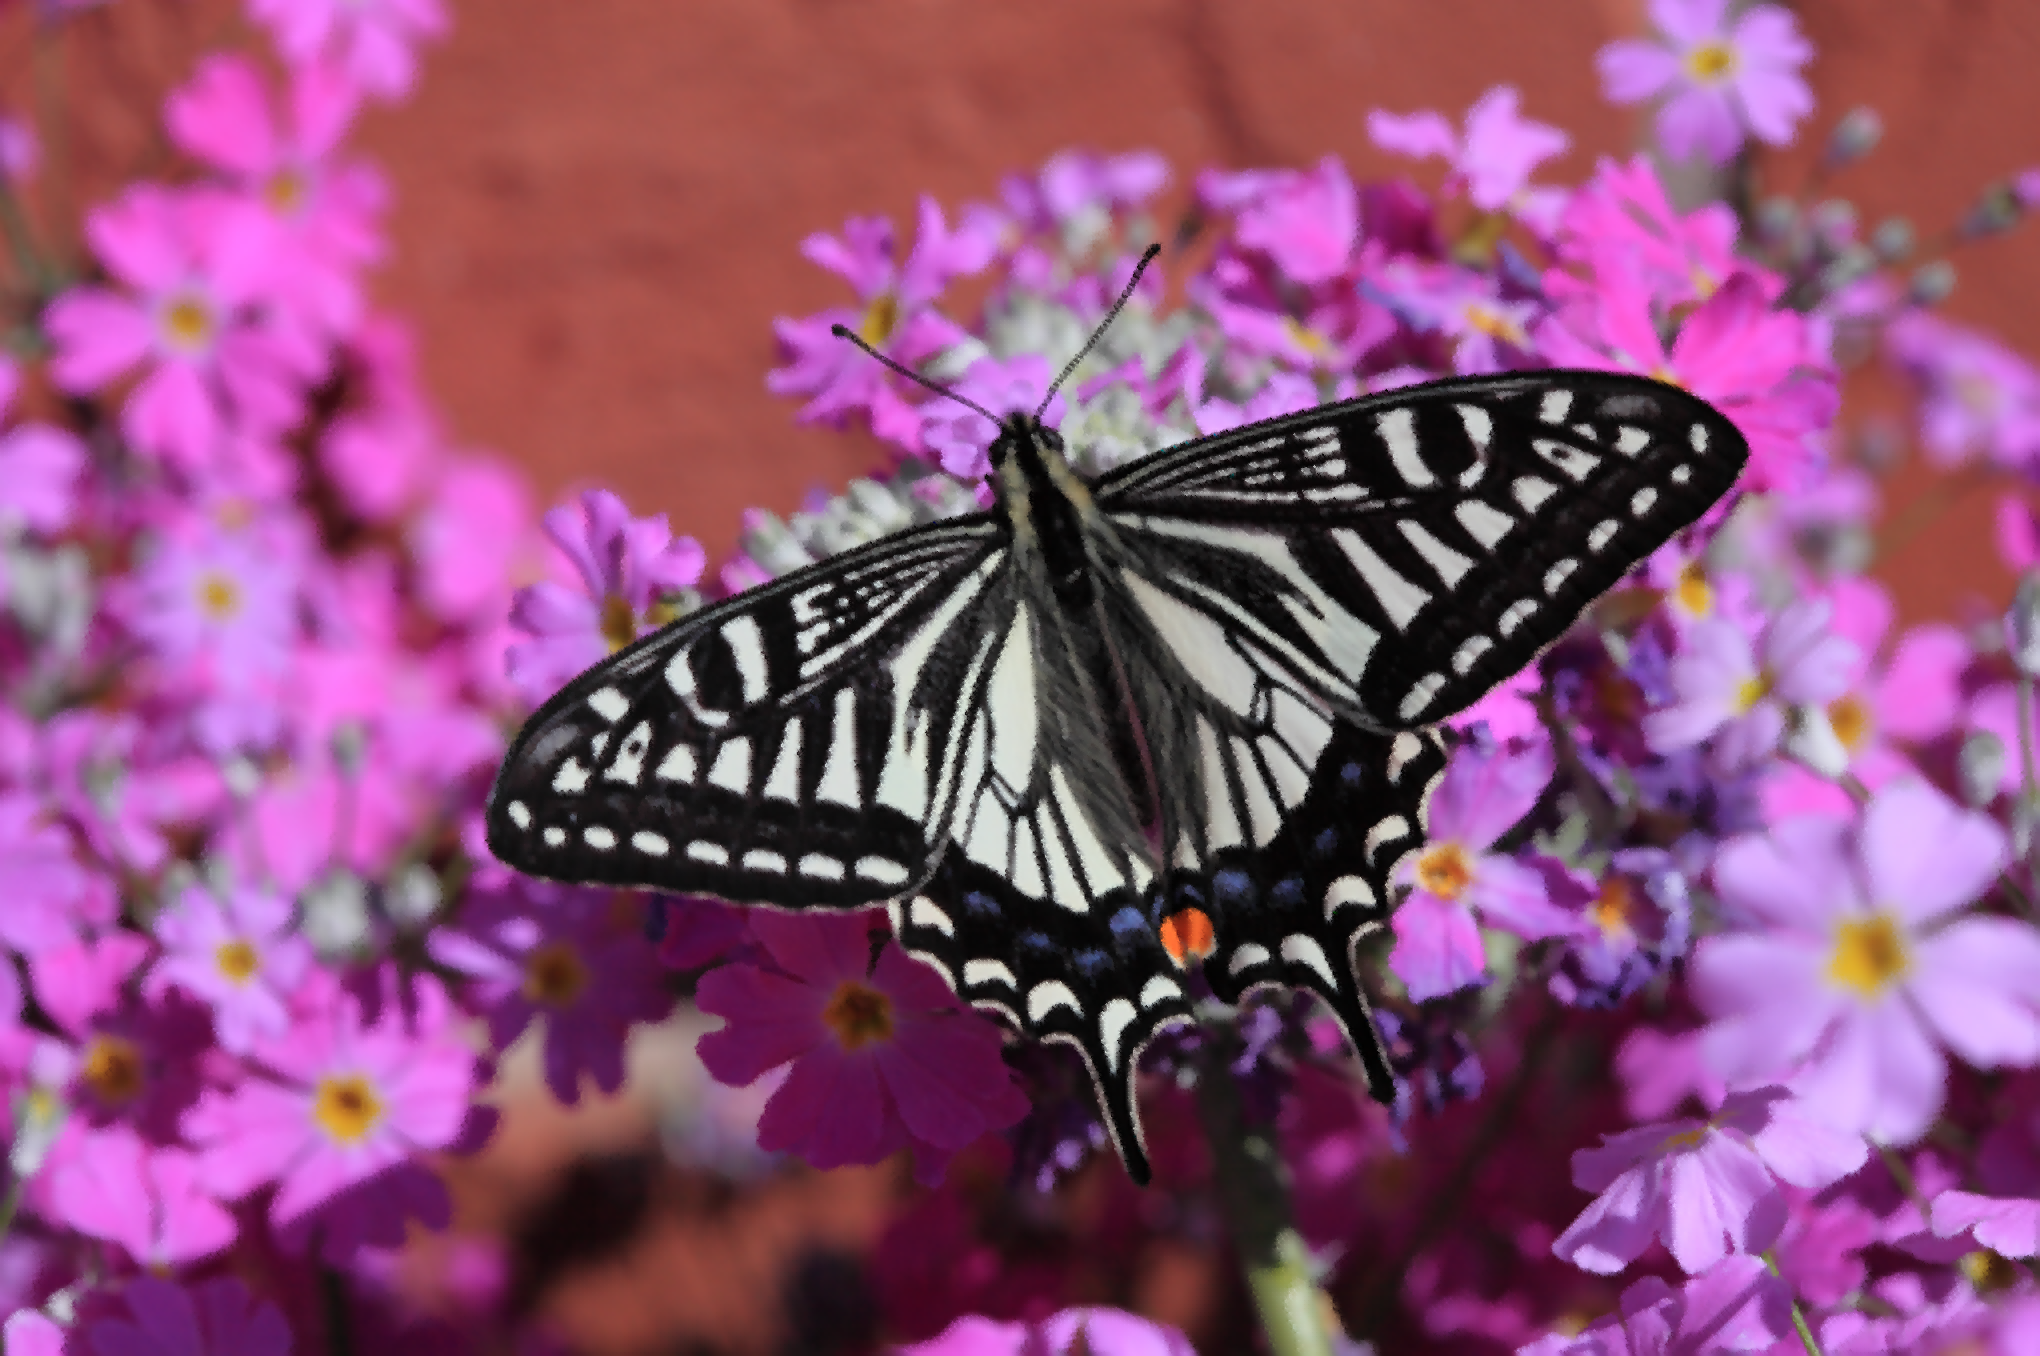

In [ ]:
cv2_imshow(output2)

In [ ]:
cv2.imwrite("Sobelbird.png",output2)

True

In [ ]:
def psnr(image1, image2):

    # OpenCV
    print('OpenCV PSNR: ', cv2.PSNR(image1, image2))

    # Own implementation
    mse = np.mean((image1.astype(np.float64) / 255 - image2.astype(np.float64) / 255) ** 2)
    print('Own implementation: ', 10 * np.log10(1. / mse))


def luma(image):
    return (0.299 * image[:, :, 2] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 0]).astype(np.uint8)
    # return (0.2126 * image[:, :, 2] + 0.7152 * image[:, :, 1] + 0.0722 * image[:, :, 0]).astype(np.uint8)
    # return (0.212 * image[:, :, 2] + 0.701 * image[:, :, 1] + 0.087 * image[:, :, 0]).astype(np.uint8)


# Calculate PSNR on referenced images
img1 = original_frame.astype('float32')
img2 = output2.astype('float32')

#img1 = interpolated_frame.astype('float32')
#img2 = frame.astype('float32')
psnr(img1, img2)

# Calculate luma PSNR on referenced images
psnr(luma(img1), luma(img2))

OpenCV PSNR:  25.95460950704745
Own implementation:  25.95460950704745
OpenCV PSNR:  25.912522309322505
Own implementation:  25.9125223093225


In [ ]:
# SSIM
from skimage.metrics import structural_similarity

before = original_frame.astype('float32')
after = output2.astype('float32')

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between two images
score = structural_similarity(before, after, multichannel=True, gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=255)
#(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image similarity", score)

<ipython-input-320-a718e8092f9b>:12: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  score = structural_similarity(before, after, multichannel=True, gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=255)


Image similarity 0.7204957
